# Trump Tweet Sentiment Analysis using Vader Sentiment Analyzer
## A small exercise to practice my text analysis skills
## Austin Seals
#### Data gathered from: http://www.trumptwitterarchive.com/

In [78]:
# sentiment analysis of trump tweets
import pandas as pd
import nltk
import re
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# import data
tweets = pd.read_csv("C:\\Users\\aseal\\Desktop\\HW Projects\\Module2\\Text Analysis\\Text Analytics Data\\TrumpTweets.csv")
tweets.text = tweets.text.astype(str)

### We need to add some stop words to the corpurs 

In [79]:
stop_words = nltk.corpus.stopwords.words( 'english' )
stop_list = ['http', 'twitter', 'web', 'rt', 'co', 'trump', 'realdonaldtrump', 'donald', 'https']
stop_words.append(stop_list)

In [80]:
vec = list(tweets['text'])

Implement Vader
    - tweets with compound scores > 0.5 will be  rated as very provactive
    - between -0.5 and 0.5 will be  rated as somewhat neutral
    - everything else is less provactive

In [53]:
values = []

# some words mentioned often need to be added to vader lexicon
words =  {'nuclear': -2.7,
         'depleted': -2.3,
         'obstruction': -1.3,
         'jail': -2.2}

# instantialte vader object 
analyzer = SentimentIntensityAnalyzer()

# add words to lexicon
analyzer.lexicon.update(words)
for tweet in vec:
    lst = []
    result = re.sub(r"http\S+", "", tweet)
    analysis = analyzer.polarity_scores(result)
    lst.append(result)
    lst.append(analysis['pos'])
    lst.append(-1*(analysis['compound']))
    lst.append(analysis['neg'])
    lst.append(analysis['neu'])
    if lst[2] >= 0.05:
        lst.append('Very Provcative')
    elif (lst[2] > -0.05) & (lst[2] < 0.05) :
        lst.append('Less Provocative')
    elif lst[2] <= -0.05:
        lst.append('Somewhat Neutral')
    values.append(lst)
    
# create dataframe from results 
sentiment = pd.DataFrame(values , columns = ['Text', 'pos','compound','neg','neu', 'sentiment'])



NameError: name 'SentimentIntensityAnalyzer' is not defined

In [83]:
sentiment.head(4)

,Text,pos,compound,neg,neu,sentiment
0,“What is happening to President Trump with Imp...,0.072,0.3164,0.105,0.823,Very Provcative
1,You would think there is NO WAY that any of th...,0.124,0.1676,0.151,0.724,Very Provcative
2,We now have the greatest Economy in history!,0.391,-0.6696,0.000,0.609,Somewhat Neutral
3,A great group of Champions!,0.796,-0.8313,0.000,0.204,Somewhat Neutral


In [84]:
sent_nTweet = sentiment[['pos','compound','neg','neu', 'sentiment']]
#final_sent = pd.concat([tweets, sent_nTweet], axis=1, ignore_index=True)

In [85]:
final_sent = pd.concat([tweets.reset_index(drop=True), sent_nTweet.reset_index(drop=True)], axis=1)

In [86]:
# final dataset 
final_sent.head(12)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,pos,compound,neg,neu,sentiment
0,Twitter for iPhone,“What is happening to President Trump with Imp...,10-16-2019 11:14:11,1179.0,3889,false,1.184427e+18,0.072,0.3164,0.105,0.823,Very Provcative
1,Twitter for iPhone,You would think there is NO WAY that any of th...,10-16-2019 11:10:02,1935.0,7121,false,1.184426e+18,0.124,0.1676,0.151,0.724,Very Provcative
2,Twitter for iPhone,We now have the greatest Economy in history! h...,10-16-2019 03:22:00,19700.0,75461,false,1.184308e+18,0.391,-0.6696,0.000,0.609,Somewhat Neutral
3,Twitter for iPhone,A great group of Champions! https://t.co/A2ux8...,10-16-2019 03:16:57,5197.0,23540,false,1.184307e+18,0.796,-0.8313,0.000,0.204,Somewhat Neutral
4,Twitter for iPhone,Looks good to me! https://t.co/3aHn7y3ZxI,10-16-2019 03:15:40,12227.0,51139,false,1.184307e+18,0.516,-0.4926,0.000,0.484,Somewhat Neutral
5,Twitter for iPhone,Shifty Adam Schiff wants to rest his entire ca...,10-16-2019 02:21:54,13957.0,52248,false,1.184293e+18,0.000,0.5859,0.073,0.927,Very Provcative
6,Twitter for iPhone,.... It also brings Shifty’s fraudulent MADE U...,10-16-2019 02:21:54,9554.0,37017,false,1.184293e+18,0.070,0.8513,0.192,0.737,Very Provcative
7,Twitter for iPhone,https://t.co/Kj1LtwYSXa https://t.co/YgXImlvOYd,10-15-2019 22:34:18,10865.0,42539,false,1.184236e+18,0.000,-0.0000,0.000,0.000,Less Provocative
8,Twitter for iPhone,The @StLouisBlues amazing comeback reminds us ...,10-15-2019 20:05:12,12976.0,53892,false,1.184199e+18,0.231,-0.7520,0.085,0.684,Somewhat Neutral
9,Twitter for iPhone,Congratulations @StLouisBlues! https://t.co/Wj...,10-15-2019 19:58:53,8068.0,33766,false,1.184197e+18,0.807,-0.6360,0.000,0.193,Somewhat Neutral


In [87]:
# write to file 
final_sent.to_csv("C:\\Users\\aseal\\Desktop\\HW Projects\\Module2\\Text Analysis\\Text Analytics Data\\sentiment_scores.csv")

In [88]:
# get a frequency count of our sentiments 

final_sent['sentiment'].value_counts(normalize=True)

Somewhat Neutral    0.550948
Very Provcative     0.284184
Less Provocative    0.164869
Name: sentiment, dtype: float64

# Now lets visualize our results

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\aseal\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# READ IN SENTIMENT DATA CREATED ABOVE
sentiment  =  pd.read_csv("C:\\Users\\aseal\\Desktop\\HW Projects\\Module2\\Text Analysis\\Text Analytics Data\\sentiment_scores.csv")

In [4]:
# A glimpse of the data
sentiment.head(3)

,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,pos,compound,neg,neu,sentiment
0,0,Twitter for iPhone,“What is happening to President Trump with Imp...,10-16-2019 11:14:11,1179.0,3889,false,1.184427e+18,0.072,0.3164,0.105,0.823,Very Provcative
1,1,Twitter for iPhone,You would think there is NO WAY that any of th...,10-16-2019 11:10:02,1935.0,7121,false,1.184426e+18,0.124,0.1676,0.151,0.724,Very Provcative
2,2,Twitter for iPhone,We now have the greatest Economy in history! h...,10-16-2019 03:22:00,19700.0,75461,false,1.184308e+18,0.391,-0.6696,0.000,0.609,Somewhat Neutral


Text(0.5, 0.92, 'Tweet Sentiment Score Scatter Plot')

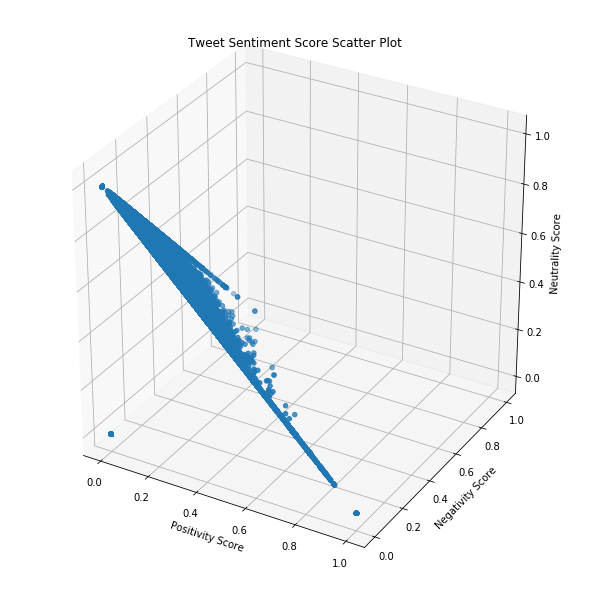

In [15]:
# CREATE A 3D PLOT OF THE POS, NEG AND NEU

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(sentiment.pos, sentiment.neg, sentiment.neu)

ax.set_xlabel('Positivity Score')
ax.set_ylabel('Negativity Score')
ax.set_zlabel('Neutrality Score')
ax.set_title('Tweet Sentiment Score Scatter Plot')

Text(0.5, 1.0, 'Sentiment Classification Frequncies')

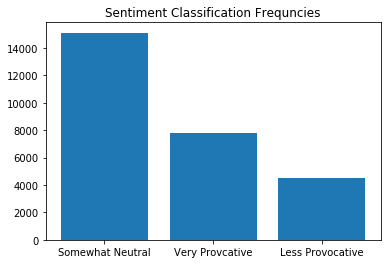

In [20]:
freq =  sentiment.sentiment.value_counts()

plt.bar(list(freq.index), freq )
plt.title('Sentiment Classification Frequncies')

In [30]:
# Pearson Correlation Coefficient between retweet count and coompounded sentiment score
sentiment.compound.corr(sentiment.retweet_count)

0.05629884837505516

# Final Thoughts

Classifying social media text is hard because of certain nunaces communction in this medium are are hard to pick up. Things like sarcasm cant be texted using basic text analysis methods.